In [1]:
#x = [0.01,0.11,0.22,0.33,0.44,0.55,0.66,0.77,0.88,0.99]
#y = [0.40,0.76,0.81,0.70,0.56,0.36,0.22,0.09,0.04,0.01]

Parámetros de ajuste: [0.5010196145624555, 1.1995658828832594, 4.075672121754021, 0.10167556390150143]


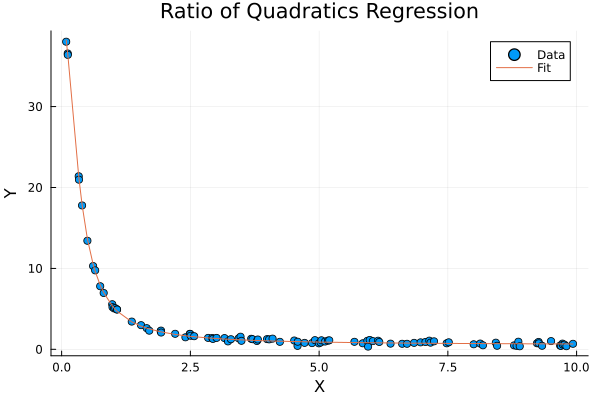

In [4]:
using LsqFit
using Plots

# Definimos la función Ratio of Quadratics
function ratio_of_quadratics(x, a, b, c, d)
    return (a*x.^2 .+ b*x .+ c) ./ (x.^2 .+ d)
end

# Generamos datos de ejemplo
x = sort(10*rand(100))
y = ratio_of_quadratics.(x, 0.5, 1.3, 4.0, 0.1) .+ 0.2*randn(length(x))

# Definimos una función de modelo no lineal para ajustar a los datos
function model(x, p)
    return (p[1]*x.^2 .+ p[2]*x .+ p[3]) ./ (x.^2 .+ p[4])
end

# Definimos los parámetros iniciales para la regresión
p0 = [1.0, 1.0, 1.0, 1.0]

# Realizamos la regresión no lineal utilizando la función curve_fit()
fit = curve_fit(model, x, y .+ 0.2 .* randn(length(y)), p0)

# Obtenemos los parámetros de ajuste de la curva
params = fit.param

# Imprimimos los parámetros de ajuste de la curva
println("Parámetros de ajuste: ", params)


# Graficar datos y función ajustada
scatter(x, y, label="Data")
plot!(x, ratio_of_quadratics(x, fit.param...), label="Fit")

# Agregar etiquetas y leyenda
xlabel!("X")
ylabel!("Y")
title!("Ratio of Quadratics Regression")
#legend()

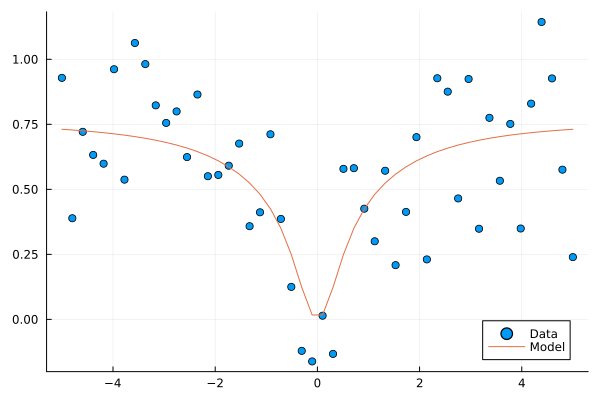

In [3]:
# Definir la función Ratio of Quadratics
function roq(x, a, b, c, d)
    return a*x.^2 ./ (1 .+ b*x.^2) .+ c*x.^2 ./ (1 .+ d*x.^2)
end

# Generar datos
x = range(-5, 5, length=50)
y = roq(x, 1.0, 2.0, 0.5, 3.0) .+ 0.2 * randn(50)

# Definir modelo de regresión no lineal
model(x, p) = roq(x, p[1], p[2], p[3], p[4])

# Estimar los parámetros del modelo
using LsqFit
p0 = [1.0, 1.0, 1.0, 1.0]
fit = curve_fit(model, x, y, p0)

# Graficar los datos y el modelo
scatter(x, y, label="Data")
plot!(x, model(x, fit.param), label="Model")